<a href="https://colab.research.google.com/github/muhammadanas25/Stock_trend_prediction/blob/main/Random_forest_Stock_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Initial imports
import pandas as pd
!pip install path
from path import Path
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
# Initial imports
import pandas as pd
import numpy as np
from path import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

from sklearn.compose import make_column_selector as selector
 

In [33]:


df = pd.read_csv("IBM.csv")
df.dropna(axis=0,inplace=True)
df=df[df.FutureTrend !='Neutral']

df.tail()

,Date,Open,High,Low,Close,Volume,EF_1,EF_2,Oil FutureTrend,Gold FutureTrend,Trend,Twitter Sentiments,FutureTrend
749,23/06/2021,146.429993,146.500000,144.570007,144.610001,3202600,0.020722,-1.242909,Negative,Positive,Negative,0,Negative
750,24/06/2021,145.800003,146.190002,144.690002,145.440002,3609700,0.500000,-0.246914,Negative,Negative,Negative,0,Negative
751,25/06/2021,145.380005,146.929993,144.949997,146.839996,3594200,0.954547,1.004259,Positive,Negative,Positive,0,Positive
752,28/06/2021,147.009995,147.300003,144.910004,145.289993,3888900,0.158992,-1.169989,Negative,Positive,Negative,0,Negative
753,29/06/2021,145.259995,146.740005,145.100006,145.550003,2428500,0.274388,0.199648,Negative,Negative,Positive,0,Negative


In [34]:
df['FutureTrend'].value_counts()

Negative    399
Positive    353
Name: FutureTrend, dtype: int64

In [35]:
# Setting Index as Date
appl_df = df.set_index("Date")
appl_df.tail()
#drop na
appl_df.dropna(axis=0,inplace=True)

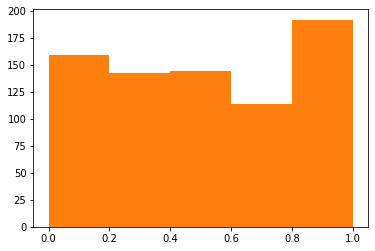

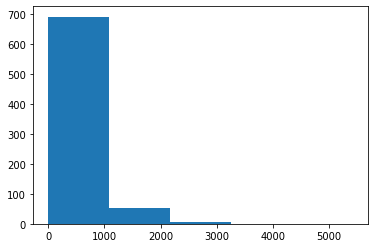

[   0.         1807.66666667 3615.33333333 5423.        ]


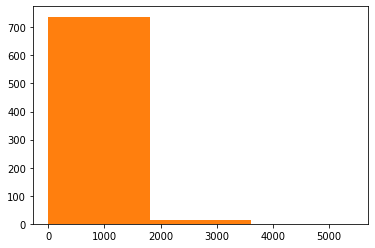

In [36]:


import matplotlib.pyplot as plt
mpgs = df['EF_1']
plt.hist(mpgs, bins=5)
ef1_cut=plt.hist(mpgs, bins=5)[1]
plt.show()
import matplotlib.pyplot as plt
mpgs = df['Twitter Sentiments']
plt.hist(mpgs, bins=5)
plt.show()
twitter_cut=plt.hist(mpgs, bins=3)[1]
print(plt.hist(mpgs, bins=3)[1]
)



def make_bins(df):
   label_names = ["Ef_1_v_low","Ef_1_low","Ef_1_v_med","Ef1_high", "Ef1_very_high" ]
   cut_points =ef1_cut
   df["EF_1_val"] = pd.cut(df["EF_1"], cut_points, labels=label_names)
   dummies = pd.get_dummies(df["EF_1_val"],drop_first=True)
   df = pd.concat([df, dummies], axis=1)
   label_names = ["setinent_neutral","sentiment_good","sentiment_bad"]
   cut_points =twitter_cut
   df["sentiments"]=pd.cut(df['Twitter Sentiments'], cut_points, labels=label_names)
   dummies1 = pd.get_dummies(df["sentiments"],drop_first=True)
   df = pd.concat([df, dummies1], axis=1)
   df.drop(["EF_1_val","sentiments"],axis=1,inplace=True)
   return df

def calculate_ema(prices, days, smoothing=2):
      ema = [sum(prices[:days]) / days]
      for price in prices[days:]:
          ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
      return ema

In [37]:
appl_df.head()

,Open,High,Low,Close,Volume,EF_1,EF_2,Oil FutureTrend,Gold FutureTrend,Trend,Twitter Sentiments,FutureTrend
Date,,,,,,,,,,,,
02/07/2018,138.279999,140.220001,138.199997,139.860001,3405400,0.821782,1.142611,Positive,Negative,Positive,574,Positive
03/07/2018,140.649994,140.940002,139.369995,139.570007,1963200,0.127396,-0.767854,Neutral,Neutral,Negative,720,Negative
05/07/2018,140.479996,141.429993,139.929993,141.429993,3744700,1.000000,0.676251,Negative,Positive,Positive,906,Negative
06/07/2018,141.529999,142.940002,141.169998,142.479996,2849000,0.740110,0.671234,Negative,Negative,Positive,837,Negative
09/07/2018,142.589996,144.720001,142.470001,144.389999,3904700,0.853333,1.262363,Negative,Positive,Positive,714,Negative


In [38]:
target=df['FutureTrend']
df=df.drop("FutureTrend",axis =1)
target= target.replace(['Negative','Positive',  'Neutral'],[0,1,2])
appl_df=df
appl_df = make_bins(df)
appl_df.head(2)
appl_df=appl_df.drop(["Twitter Sentiments"],axis =1)
appl_df['diff']=appl_df['Close']-appl_df['Open']
appl_df['10day']=appl_df['Close'].rolling(10).mean()
appl_df['10day'].fillna(appl_df['10day'][9],inplace=True)
appl_df['Volume']=np.log(appl_df['Volume'])
ema = calculate_ema(appl_df['Close'], 10)
appl_df=appl_df[9:]
target=target[9:]

appl_df['ema']=ema
appl_df['signal']=appl_df['ema']>appl_df['Close']

del (appl_df['Open'])
del (appl_df['Close'])
del (appl_df['High'])
del (appl_df['EF_2'])



# appl_df['normVol'] = appl_df['Volume'] / appl_df['Volume'].ewm(5).mean()   

appl_df.head()

,Date,Low,Volume,EF_1,Oil FutureTrend,Gold FutureTrend,Trend,Ef_1_low,Ef_1_v_med,Ef1_high,Ef1_very_high,sentiment_good,sentiment_bad,diff,10day,ema,signal
9,16/07/2018,144.210007,15.059319,0.791146,Negative,Positive,Negative,0,0,1,0,0,0,-0.209992,143.519000,143.519000,False
10,17/07/2018,143.339996,15.444104,0.090367,Negative,Negative,Negative,0,0,0,0,0,0,-1.259995,143.882001,143.513728,True
11,18/07/2018,142.740005,15.752135,0.864078,Negative,Positive,Positive,0,0,0,1,1,0,1.010010,144.377000,143.696688,False
12,19/07/2018,147.250000,16.500347,0.604866,Negative,Negative,Positive,0,0,1,0,0,0,1.389999,145.158002,144.704564,False
13,20/07/2018,146.259995,15.674087,0.034620,Positive,Positive,Negative,0,0,0,0,0,0,-2.229996,145.545003,145.003735,False


In [39]:
new_df=appl_df
new_df.set_index('Date',inplace=True)
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
numerical_columns = numerical_columns_selector(new_df)
categorical_columns = categorical_columns_selector(new_df)
print(categorical_columns)
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('minmax-scaler', numerical_preprocessor, numerical_columns)])



['Oil FutureTrend', 'Gold FutureTrend', 'Trend']


In [40]:

model_rf1 =make_pipeline(preprocessor,RandomForestClassifier(n_estimators=30,
                                      max_features=2,
                                      max_depth=3,
                                      random_state=0))
X_train,X_test, y_train, y_test = train_test_split(new_df, target, test_size=0.1, random_state=42)
  # Scoring the model
model_rf1.fit(X_train,y_train)
print("Accuracy score (training): {0:.3f}".format(
        model_rf1.score(
            X_train, 
            y_train)))
print("Accuracy score (validation): {0:.3f}".format(
        model_rf1.score(
            X_test, 
            y_test)))


Accuracy score (training): 0.657
Accuracy score (validation): 0.507


In [41]:
df_t=preprocessor.fit_transform(new_df)
df_t

array([[ 1.        ,  0.        ,  0.        , ...,  1.06017436,
         1.08552719, -0.87216025],
       [ 1.        ,  0.        ,  0.        , ...,  1.09349757,
         1.08503216,  1.14657828],
       [ 1.        ,  0.        ,  0.        , ...,  1.13893823,
         1.1022124 , -0.87216025],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.34153934,
         1.35725338, -0.87216025],
       [ 1.        ,  0.        ,  0.        , ...,  1.2980264 ,
         1.33808493,  1.14657828],
       [ 1.        ,  0.        ,  0.        , ...,  1.26305086,
         1.32684083,  1.14657828]])

train_test splt

In [42]:


from sklearn.pipeline import make_pipeline

model_rf =RandomForestClassifier(n_estimators=30,
                                      max_features=2,
                                      max_depth=3,
                                      random_state=0)

In [43]:
X_train,X_test, y_train, y_test = train_test_split(df_t, target, test_size=0.1, random_state=42)

In [44]:
  # Scoring the model
model_rf.fit(X_train,y_train)
print("Accuracy score (training): {0:.3f}".format(
        model_rf.score(
            X_train, 
            y_train)))
print("Accuracy score (validation): {0:.3f}".format(
        model_rf.score(
            X_test, 
            y_test)))


Accuracy score (training): 0.657
Accuracy score (validation): 0.507


Hyper 

In [45]:
param_grid = {
'n_estimators': [50, 100, 200, 300],
'min_samples_leaf': [1, 5, 10],
'max_depth': [2, 4, 6, 8, 10],
'max_features': ['auto', 'sqrt'],
'bootstrap': [True, False]}

In [46]:
dff=preprocessor.fit_transform(new_df)


X_train, X_test, y_train, y_test = train_test_split(dff, target, train_size= 0.2,shuffle=False)
from imblearn.over_sampling import SMOTE

# pd.DataFrame(oe_df)
rf=RandomForestClassifier()
model_gridsearch =   GridSearchCV(
estimator=rf,
param_grid=param_grid,
scoring='accuracy',

cv=5,
refit=True,
return_train_score=True)

Grid search

In [47]:
model_gridsearch.fit(X_train, y_train)
# Print the time spend and number of models ran
print("GridSearchCV took %.2f seconds for %d candidate parameter settings." ,len(model_gridsearch.cv_results_['params']))

GridSearchCV took %.2f seconds for %d candidate parameter settings. 240


In [48]:
y_pred_grid = model_gridsearch.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)


In [49]:
print(model_gridsearch.best_params_)
print(model_gridsearch.best_score_)

{'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 300}
0.506896551724138


In [50]:
print (accuracy_grid)
print(y_pred_grid)

0.5495798319327732
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0

In [51]:
 np.array(np.unique(target, return_counts=True)).T

array([[  0, 393],
       [  1, 350]])

In [52]:
model_rf = RandomForestClassifier(bootstrap= True, max_depth= 10, max_features= 'auto', min_samples_leaf= 1, n_estimators= 200)
model_rf.fit(X_train,y_train)
  # Scoring the model
print("Accuracy score (training): {0:.3f}".format(
        model_rf.score(
            X_train, 
            y_train)))
print("Accuracy score (validation): {0:.3f}".format(
        model_rf.score(
            X_test, 
            y_test)))


Accuracy score (training): 1.000
Accuracy score (validation): 0.531


In [53]:
df.tail()

,Date,Open,High,Low,Close,Volume,EF_1,EF_2,Oil FutureTrend,Gold FutureTrend,Trend,Twitter Sentiments,EF_1_val
749,23/06/2021,146.429993,146.500000,144.570007,144.610001,3202600,0.020722,-1.242909,Negative,Positive,Negative,0,Ef_1_v_low
750,24/06/2021,145.800003,146.190002,144.690002,145.440002,3609700,0.500000,-0.246914,Negative,Negative,Negative,0,Ef_1_v_med
751,25/06/2021,145.380005,146.929993,144.949997,146.839996,3594200,0.954547,1.004259,Positive,Negative,Positive,0,Ef1_very_high
752,28/06/2021,147.009995,147.300003,144.910004,145.289993,3888900,0.158992,-1.169989,Negative,Positive,Negative,0,Ef_1_v_low
753,29/06/2021,145.259995,146.740005,145.100006,145.550003,2428500,0.274388,0.199648,Negative,Negative,Positive,0,Ef_1_low
